<a href="https://colab.research.google.com/github/nuwanc/ml/blob/main/Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries and data

In [ ]:
import pandas as pd
from fbprophet import Prophet

In [ ]:
df = pd.read_csv("https://bit.ly/udemy_df")
df.head()

,Date,Udemy,Easter,Christmas
0,1/1/2016,311,0,0
1,1/2/2016,564,0,0
2,1/3/2016,517,0,0
3,1/4/2016,652,0,0
4,1/5/2016,756,0,0


#Data Prep

In [ ]:
df.Date = pd.to_datetime(df.Date,
                         format = "%m/%d/%Y")
df.head()

,Date,Udemy,Easter,Christmas
0,2016-01-01,311,0,0
1,2016-01-02,564,0,0
2,2016-01-03,517,0,0
3,2016-01-04,652,0,0
4,2016-01-05,756,0,0


In [ ]:
#rename variables
df = df.rename(columns = {'Date': 'ds',
                          'Udemy': 'y'})
df.head(0)

,ds,y,Easter,Christmas


In [ ]:
#Training and test
training = df.iloc[:-31,:]
test = df.iloc[-31:,:]

#Facebook Prophet model

In [ ]:
#FB model
m = Prophet()
m.add_regressor("Easter")
m.add_regressor("Christmas")
m.fit(training)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



#Predictions

In [ ]:
#create a future df
future = m.make_future_dataframe(periods = 31,
                                 freq = "D")
future = pd.concat([future, df.iloc[:, 2:]], axis = 1)
future

In [ ]:
#forecasting
forecast = m.predict(future)

#Visualization

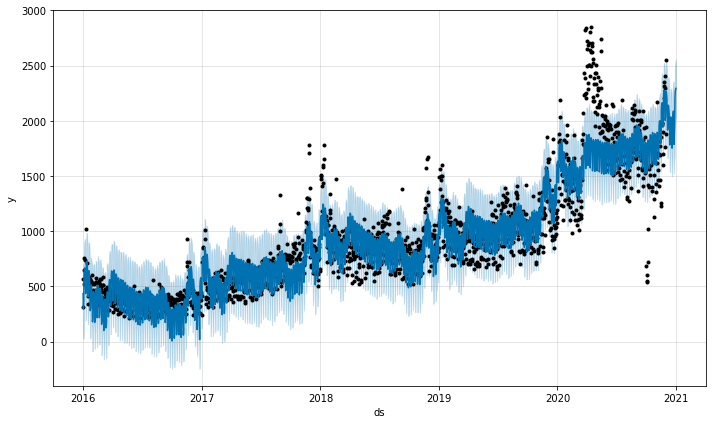

In [ ]:
#forecast viz
m.plot(forecast);

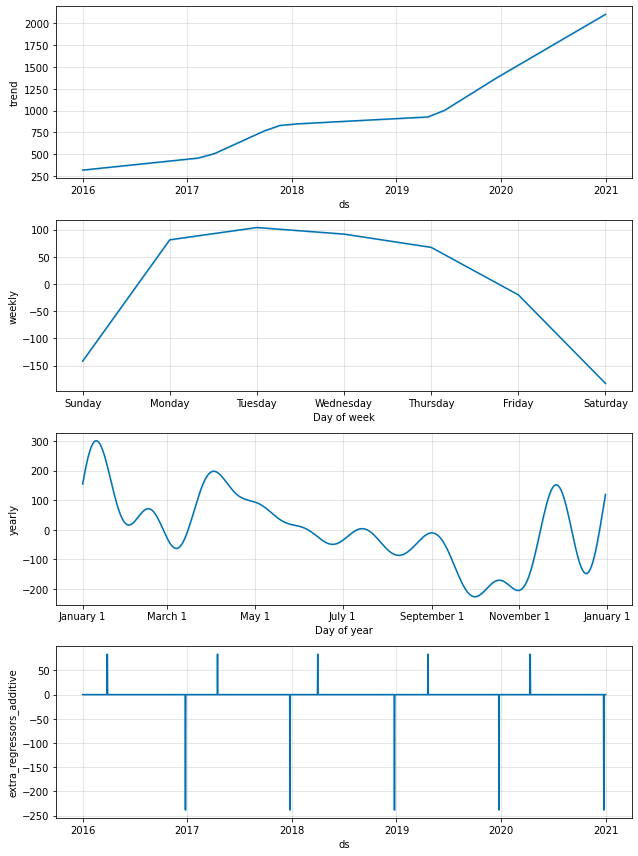

In [ ]:
#plot components
m.plot_components(forecast);